# Visualizing the Pokemon dataset - Zach B.

## **Importing necessary libraries**

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## **Read in the dataset and take a peek at the variables**

In [15]:
df = pd.read_csv('pokemon.csv')
print(df.columns)
df.head()

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


## **Clean and make some changes to the data (I will leave null values alone for now)**

In [16]:
# make pokededex_number the index and drop the column
df.set_index(df['pokedex_number'], inplace = True)
df.drop(columns=['pokedex_number'], inplace = True)

In [17]:
# make legendary column easier to read from, change all values to bool
df['is_legendary'] = [bool(val) for val in df['is_legendary']]

## **Visualize some relationships between attributes of the pokemon**

### **Height vs Weight**

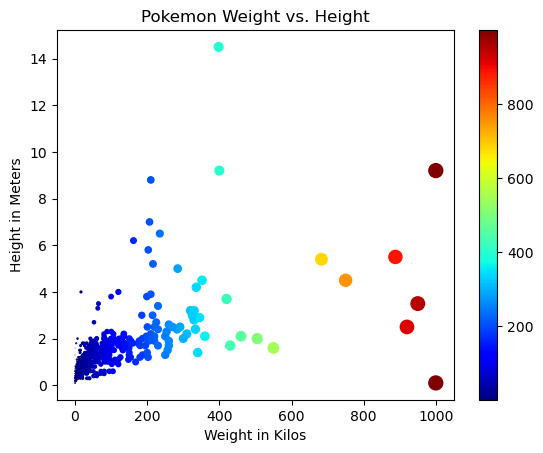

In [18]:
plt.scatter(x = df['weight_kg'], y = df['height_m'], c = df['weight_kg'], s = df['weight_kg'] / 10, marker = 'o', cmap = 'jet')
plt.xlabel('Weight in Kilos')
plt.ylabel('Height in Meters')
plt.title('Pokemon Weight vs. Height')
plt.colorbar()
plt.show()

### **Adding a third variable**

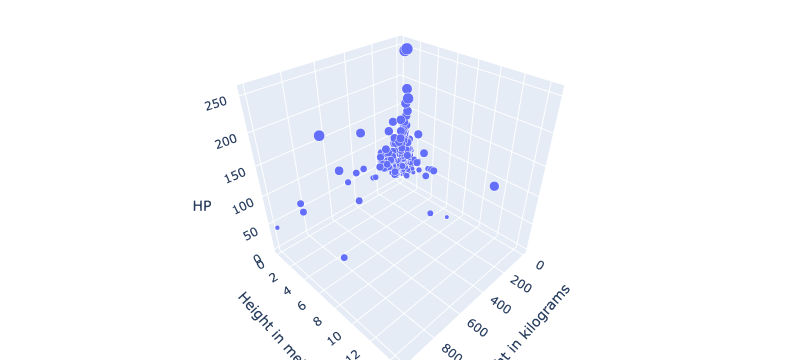

In [24]:
# taking from the graph above im adding hp (health points) as a third variable
#using scatter_3d from plotly express

fig = px.scatter_3d(df, x = 'weight_kg', y = 'height_m', z = 'hp', size = 'hp',
                   labels = {'weight_kg' : 'Weight in kilograms', 
                             'height_m' : 'Height in meters', 'hp' : 'HP'},
                   opacity = 1)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))
fig.show()

### **Numeric representation of primary and secondary Pokemon types**

In [20]:
# contruct groups with primary types and their counts
prim_types = df.groupby('type1').size().sort_values(ascending = False).reset_index(name = 'count')

# same thing with the secondary types
sec_types = df.groupby('type2').size().sort_values(ascending = False).reset_index(name = 'count')

print(prim_types)
print('\n')
print(sec_types)

       type1  count
0      water    114
1     normal    105
2      grass     78
3        bug     72
4    psychic     53
5       fire     52
6       rock     45
7   electric     39
8     ground     32
9     poison     32
10      dark     29
11  fighting     28
12     ghost     27
13    dragon     27
14     steel     24
15       ice     23
16     fairy     18
17    flying      3


       type2  count
0     flying     95
1     poison     34
2     ground     34
3    psychic     29
4      fairy     29
5   fighting     25
6      steel     22
7       dark     21
8      grass     20
9      water     17
10    dragon     17
11       ice     15
12     ghost     14
13      rock     14
14      fire     13
15  electric      9
16       bug      5
17    normal      4


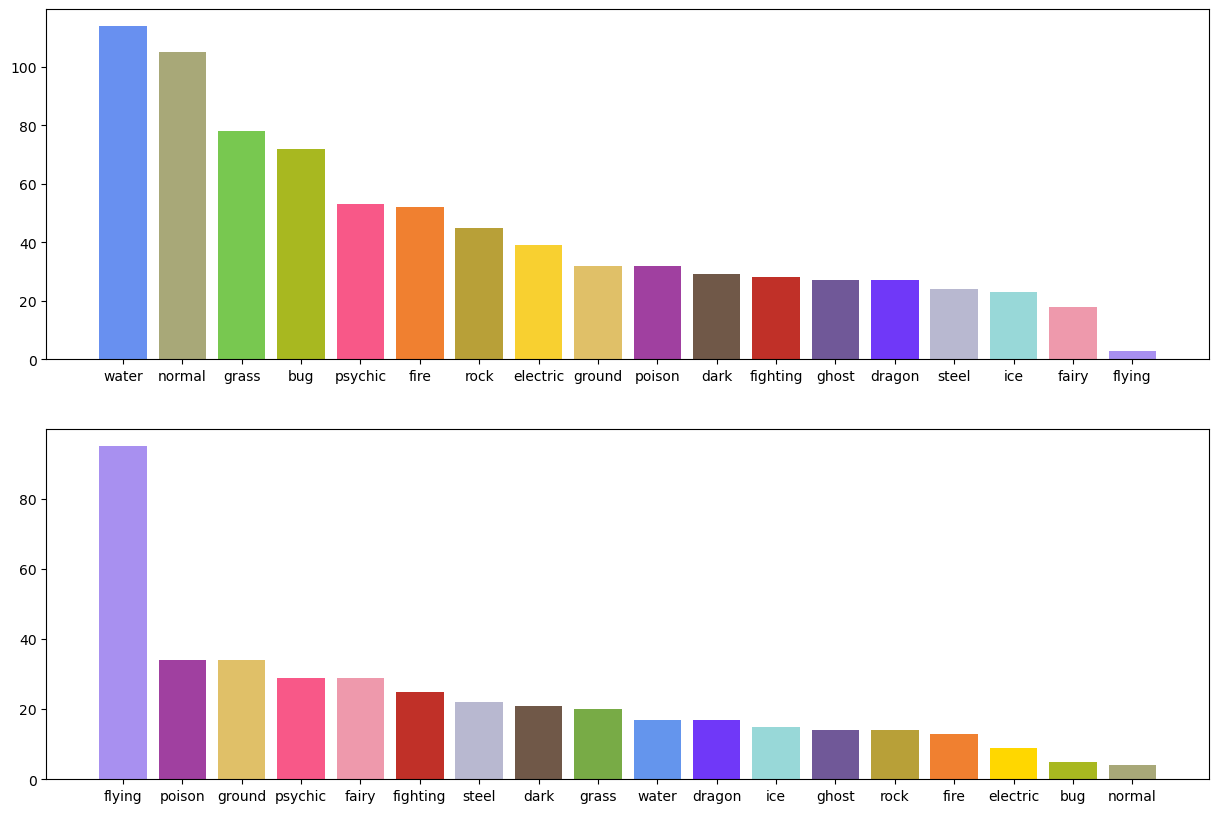

In [21]:
# lists of colors for each group of types (same colors just rearranged differently)
prim_types_colors = ['#6890F0', '#A8A878', '#78C850', '#A8B820', '#F85888', '#F08030', '#B8A038', '#F8D030', '#E0C068', '#A040A0', '#705848', '#C03028', '#705898', '#7038F8', '#B8B8D0', '#98D8D8', '#EE99AC', '#A890F0']
sec_types_colors = ['#A890F0', '#A040A0', '#E0C068', '#F85888', '#EE99AC', '#C03028', '#B8B8D0', '#705848', '#78AB46', '#6495ED', '#7038F8', '#98D8D8', '#705898', '#B8A038', '#F08030', '#FFD700', '#A8B820', '#A8A878']

plt.figure(figsize = (15, 10)) # adjust plot size for discrepancies

plt.subplot(211) # nrows, ncolumns, index
plt.bar(prim_types['type1'], prim_types['count'], color = prim_types_colors, label = 'one')

plt.subplot(212) # nrows, ncolumns, index
plt.bar(sec_types['type2'], sec_types['count'], color = sec_types_colors, label = 'two')

plt.show()

### **Does type affect the attack stat?**

In [22]:
# construct the groupby object (technically df) with prim types and attack vals
prim_types_strength = df.groupby('type1')['attack'].mean().sort_values(ascending = False).reset_index()

# same thing with secondary types
sec_types_strength = df.groupby('type2')['attack'].mean().sort_values(ascending = False).reset_index()

print(prim_types_strength)
print('\n')
print(sec_types_strength)

       type1      attack
0     dragon  106.407407
1   fighting   99.178571
2     ground   94.812500
3      steel   93.083333
4       rock   90.666667
5       dark   87.793103
6       fire   81.500000
7     normal   75.161905
8      grass   73.769231
9      water   73.307018
10       ice   73.304348
11     ghost   72.740741
12    poison   72.656250
13  electric   70.820513
14       bug   70.125000
15    flying   66.666667
16   psychic   65.566038
17     fairy   62.111111


       type2      attack
0   fighting  107.960000
1      steel   97.454545
2       dark   95.904762
3      ghost   95.571429
4        ice   88.666667
5     dragon   88.470588
6       rock   86.857143
7     ground   86.058824
8     flying   78.389474
9      grass   78.250000
10   psychic   76.586207
11       bug   76.000000
12  electric   74.777778
13     water   70.176471
14    poison   67.617647
15      fire   66.000000
16     fairy   63.482759
17    normal   52.750000


<Axes: xlabel='attack', ylabel='type2'>

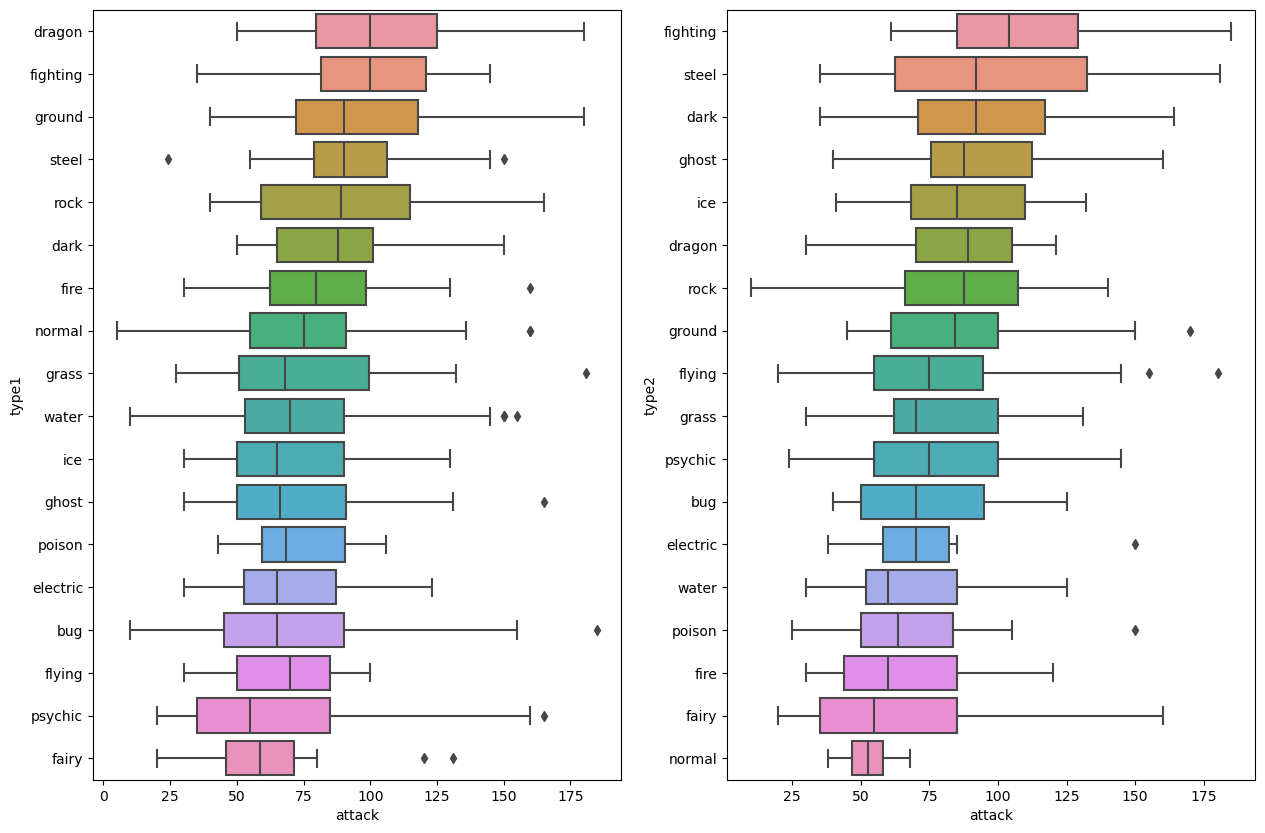

In [23]:
# play around with the figsize
plt.figure(figsize = (15, 10))

# primary strength plot first
plt.subplot(121) #nrows, ncolumns, index
sns.boxplot(x = df['attack'], y = df['type1'], order = prim_types_strength['type1'])

# secondary strength plot 
plt.subplot(122) # nrows, ncolumns, index
sns.boxplot(x = df['attack'], y = df['type2'], order = sec_types_strength['type2'])